In [1]:
# First step is  importing libraries  that I will use in my work today 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings #I've  imported warnings that I can ignore any errors.
warnings.simplefilter(action='ignore') #This means that if I've imported  two different types of warnings(above) in my code and
#I  set the warning filter to ignore, both types of warnings will be suppressed and not displayed.

In [2]:
# signing to variables our train and test csv files 
tr_df = pd.read_csv("train.csv")

te_df = pd.read_csv("test.csv")

In [3]:
#checking my tr_df set to see what  data I got in my set. I needed it to check some columns names that didn't makes sense for me.
# SisbSp the number of siblings or spouse of a person onboard. 
# Parch  it means number of Parents/Children Aboard.
# Pclass passenger class
tr_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking my te_df TOP 5 to see what data is in my columns etc.
te_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# checking how many rows I got in my tr_df data set . I used  {} . format method here
print('The number of samples into the train data is {}.'.format(tr_df.shape[0]))

The number of samples into the train data is 891.


In [6]:
#checking how many rows I got in our sample te_df data set I used f string method here 
print(f"The number of samples into the train data is {te_df.shape[0]}")

The number of samples into the train data is 418


In [7]:
# I want to check for missing values in our tr_df data set
tr_df.isnull().sum()

#We can easily spot massive numebr 687 rows is MISSING , when our whole DB rows are 891 ! 
# We are missing  177 rows of age of our passengers , and 2 rows in Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# I will check what  column 'Age'  precentage % of our data is missing .
print('Our percent of missing "Age" records is %.2f%%' %((tr_df['Age'].isnull().sum()/tr_df.shape[0])*100))




Our percent of missing "Age" records is 19.87%


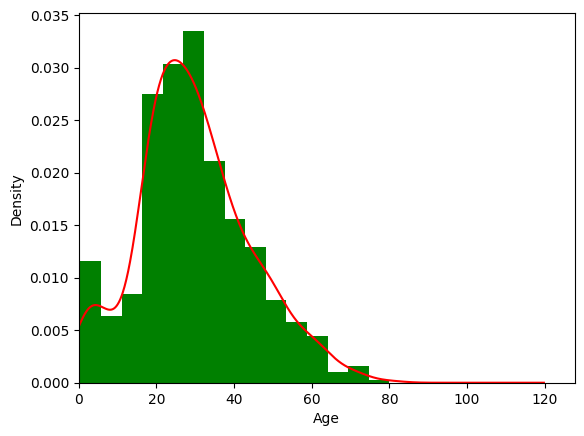

In [9]:
# I will create histogram  to visual our age groups


ax = tr_df["Age"].hist(bins=15, density=True, stacked=True, color='green')
tr_df["Age"].plot(kind='density', color='red')

ax.set(xlabel='Age')
plt.xlim(0)
plt.show()

# Since "Age" is (right) skewed, using the mean(average) might give us biased results by filling in ages that are older than desired.
#  To deal with this, we'll use the median(middle number in our data set) to filling the missing values.

In [10]:
# median age - the skipna means we can  'skip'(avoid them)  the missing values when the mean is calculated.

print('The median of  column "Age" is %.2f' %(tr_df["Age"].median(skipna=True)))

The median of  column "Age" is 28.00


In [11]:
# We will now count the percentage of  missing 'Cabin' columns values  . Same think we did for Age column before.

print('Our percent of missing "Cabin" records is %.2f%%' %((tr_df['Cabin'].isnull().sum()/tr_df.shape[0])*100))


# Like we can see from our calculation missing 77.10% of our values in column 'Cabin' makes this column hard to work on.
# I will ignore it in my further work (will drop the column)

Our percent of missing "Cabin" records is 77.10%


In [12]:
# Ebmarked similar  meaning  to borded the ship. I will count out the % of missing Embarked on our ship.
# I googled name of ports to know where they boarded the ship.


print('Passengers grouped by port of boarded the ship  (C = Cherbourg,   S = Southampton , Q = Queenstown ):')
print(tr_df['Embarked'].value_counts())


Passengers grouped by port of boarded the ship  (C = Cherbourg,   S = Southampton , Q = Queenstown ):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


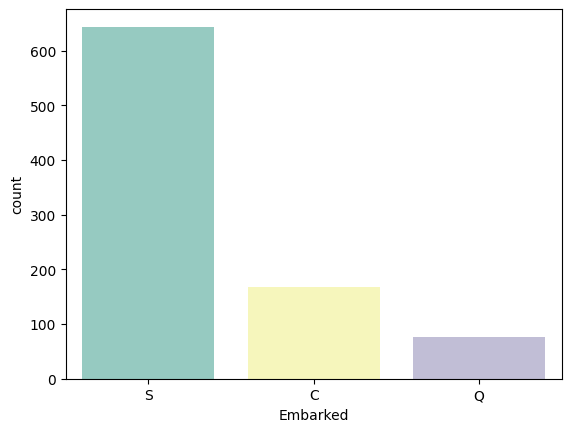

In [13]:
#We could clearly see from calc that most of people boarded in Southampton but to make it clear we can make a graph/plot


sns.countplot(x='Embarked', data=tr_df, palette='Set3')
plt.show()

In [14]:
# Looking at what I'm missing in the data set , I will take following steps:
# If Age is missing a  value I will use median which is 28.00 , from our earlier calculation
# Missing 'Embarked' value will be filled by me with 'S' (the port mostly people boarded from is Southampton)
# I will NOT use 'Cabin' column because like we calculated before it's over 77% missing !! 


In [15]:
#Prepocessing on wide scale ( in here I create new data frame first , train_data=tr_df.copy() it copies what we had in tr_df

train_data = tr_df.copy()
# I use my new df train_data and filled null values in col Age with median (like we calc. it before 28.00)
train_data["Age"].fillna(tr_df["Age"].median(skipna=True), inplace=True)
# next step is embarked col which we fill null values , we count the  values (C,S,Q ports) and then using idxmax() we
#getting index with highest count and it replace the null values with it.
train_data["Embarked"].fillna(tr_df['Embarked'].value_counts().idxmax(), inplace=True)
# last step in here we drop the Cabin column because of over 77% of data is missing.

train_data.drop('Cabin', axis=1, inplace=True)

In [16]:
# Here I'm checking if all steps I took before worked fine , I got no null values no more.
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
## Create categorical variable for traveling alone. Like we said before: 
## SisbSp the number of siblings or spouse of a person onboard. 
# Parch  it means number of Parents/Children Aboard.
# What I'm doing here is combine  the both column that you traveled with someone and creating one binary column(0,1):
# which will tell me if you traveled alone or with someone(spouse/sibling/children/parent)  0 means NOT ALONE , 1 alone.
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
#dropping columns : SibSp and Parch with indication to True which allow me to modify the train_data DataFrame directly, instead of creating a new DataFrame.
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,1


In [18]:
#Step by step what we doing :
# We create variable training to use pd.get_dummies function from the Pandas library to convert categorical variables in the train_data Df into dummy/indicator variables. 
# The columns parameter specifies which columns in the DataFrame to convert. 
# In this case, the "Pclass" and "Embarked" columns are being converted.
# get_dummies function is used to convert categorical variables into dummy or indicator variables. 
# A dummy or indicator variable can have a value of 0 or 1.

training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])




# In this line we drop PassengerId column  from training data frame.
# The drop method removes a PassengerId column from a DataFrame, and the inplace parameter is set to True to modify
#  the training DataFrame directly, instead of creating a new DataFrame.
training.drop('PassengerId', axis=1, inplace=True)

#We doing same steps like for PassengerId column
training.drop('Name', axis=1, inplace=True)

# Same steps like PassengerId column

training.drop('Ticket', axis=1, inplace=True)

#same steps like PassengerId column
training.drop('Sex_female', axis=1, inplace=True)


# we  created a new variable final_train and assigns it the value of the training DataFrame.
# I've changed the column Sex_male to Gender to be clearer .

final_train = training
final_train = final_train.rename(columns={'Sex_male': 'Gender'})

final_train


,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Gender
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,0,1,1
887,1,19.0,30.0000,1,1,0,0,0,0,1,0
888,0,28.0,23.4500,0,0,0,1,0,0,1,0
889,1,26.0,30.0000,1,1,0,0,1,0,0,1


In [19]:
te_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
#I will do same steps on column "Age" in the te_df as I did for my tr_df (if missing, use Age median 28.00).
#I'll also remove the "Cabin" column from the test data, as I've decided not to include it in my analysis(77.10% missing)
#in this set  were no missing values in the "Embarked" port variable.
#I'll add the dummy var to finalize my test set.


median = te_df["Fare"].median().round(2)
median

#Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45 in upcoming step.


14.45

In [21]:
## SisbSp the number of siblings or spouse of a person onboard. 
# Parch  it means number of Parents/Children Aboard.
#This line creates a copy of the test_df DataFrame and stores it in the test_data variable. 
# This is done so that any changes made to the test_data DataFrame do not affect the original test_df DataFrame.
test_data = te_df.copy()

#This line replaces any missing values in the "Age" column of the te_data DataFrame with the median value of the "Age" column in the tr_df DataFrame.
# The inplace=True argument means that the changes will be made directly to the test_data , without creating a new DataFrame.
test_data["Age"].fillna(tr_df["Age"].median(skipna=True), inplace=True)
# It same rules like for column Age but this time we working on column Fare.
test_data["Fare"].fillna(tr_df["Fare"].median(skipna=True), inplace=True)
#Here we dropping column Cabin , inplace True specify that changes will be made directly to DF test_data.
test_data.drop('Cabin', axis=1, inplace=True)
#This line creates a new column in the test_data  called "TravelAlone". 
#The condition (test_data["SibSp"] + test_data["Parch"]) > 0 checks whether the sum of the SibSp and Parch columns is greater than 0. If the sum is greater than ZERO, the value 0( NOT alone) is assigned to the TravelAlone column.
#  If the sum is equal to or less than zero, the value 1( alone) is assigned to the TravelAlone column.
test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)
#This two lines of code droping respectively: SibSp and Parch which we do NOT need because we combine and create TraveAlone column.
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)




In [22]:
#Remember port names C = Cherbourg, Q = Queenstown, S = Southampton
#Pclass passenger class
#This line creates a new dataframe testing by converting categorical columns Pclass, Embarked, and Sex into dummy variables.
#The pd.get_dummies function creates a new dataframe that has one column for each unique value in the original columns.
#Each row will have 1s and 0s in the dummy columns to indicate the presence or absence of the original value. 
#For example, the Embarked column with values 'S', 'C', and 'Q' will be converted into three columns Embarked_S, Embarked_C, and Embarked_Q with 1s and 0s.
testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])

# Next 4 lines are dropping columns: Sex_female, PassengerId, Name, Ticket.
#Inplace set to True means ORIGINAL dataframe is getting modified , without need to create new dataframe with changes.
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)


#This line creates a new variable final_test and assigns/hold the value of the testing dataframe that we created before.
final_test = testing

#here we checking TOP 5 rows of the final_test, and I'm changing column name to Gender.
final_test.rename(columns={'Sex_male': 'Gender'})






,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Gender
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,1,0,0,1,0,0,1,1
414,39.0,108.9000,1,1,0,0,1,0,0,0
415,38.5,7.2500,1,0,0,1,0,0,1,1
416,28.0,8.0500,1,0,0,1,0,0,1,1


In [23]:
# This line of code is creating a binary variable 'IsMinor' that indicates whether a passenger is below 16 years old (1)
#  or not (0), based on their 'Age' value.


final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

#showing that my  column isMinor does work, on TOP 5 rows 
final_train.head()


,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Gender,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


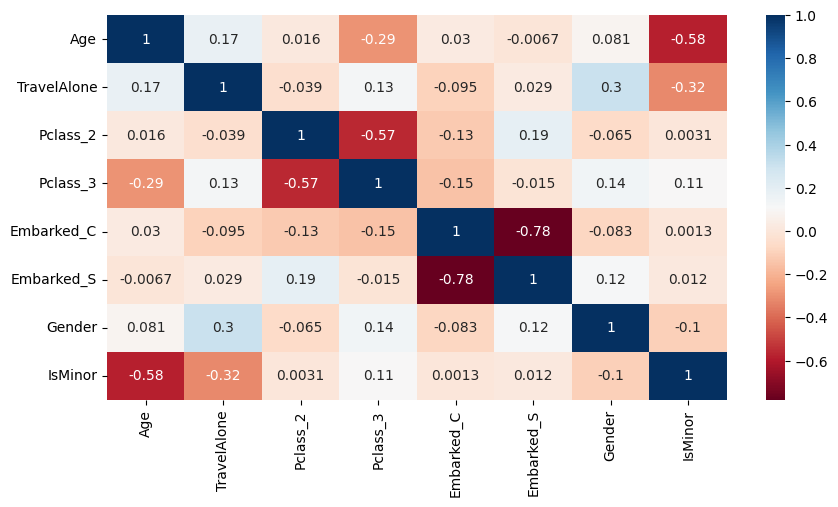

In [24]:
# This line defines a list of column names that we want to select from final_train. The columns are:
#Age, TraveAlone, Pclass2, Pclass3, Embarked_C, Embarked_S, Gender, IsMinor

my_choice = ['Age', 'TravelAlone', 'Pclass_2', 'Pclass_3', 'Embarked_C', 
                     'Embarked_S', 'Gender','IsMinor']
#This line creates a new DataFrame X that contains only the columns listed in my_choice 
# It does this by using the indexing operator [ ] on final_train and passing in my_choice as the argument.

X = final_train[my_choice]
#This creates a new figure with a size of 10  by 5 .
# The subplots() function returns a tuple containing a Figure object and a Axes object
plt.subplots(figsize=(10, 5))
#This line of code  creates a heatmap using Seaborn's heatmap() function. 
#The input to heatmap() is the correlation matrix of X, which is obtained using the corr() method on X.
#The annot=True argument adds the correlation coefficients to the heatmap. 
#The cmap="RdBu" argument sets the color scheme for the heatmap to red and blue.
sns.heatmap(X.corr(), annot=True, cmap="RdBu")
plt.show()

In [25]:


# The variable X is being assigned the values of a subset of columns from the final_train DataFrame. 
# The column names are specified in the list my_choice
X = final_train[my_choice]
#The variable y is being assigned the values of the 'Survived' column of the final_train DataFrame.
y = final_train['Survived']


# I used the train_test_split() function from scikit-learn library.  
# I used it to split the input and output data (X and y) into training and testing sets.
# Used 20% for testing. 
# The random_state  ensures that the data will be split in the same way every time you run the code,
# which can be useful for reproducibility and for comparing the performance of different models on the same data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# I've created an instance of the LogisticRegression() class and assign it to the variable logreg.
logreg = LogisticRegression()
#I'm using the fit the logistic regression model to the training data (X_train and y_train) using the fit() method. 
logreg.fit(X_train, y_train)
#We use the fitted model to make predictions on the testing data (X_test) using the predict() method. 
#The predicted values are assigned to the variable y_pred.
y_pred = logreg.predict(X_test)
#We print the accuracy of the logistic regression model as a formatted string using the % operator to substitute the accuracy score in the string.
#  The accuracy score is rounded to two decimal places using the %2.2f format specifier.
print("Logistic Regression accuracy is %2.2f" % accuracy_score(y_test, y_pred))




Logistic Regression accuracy is 0.78
